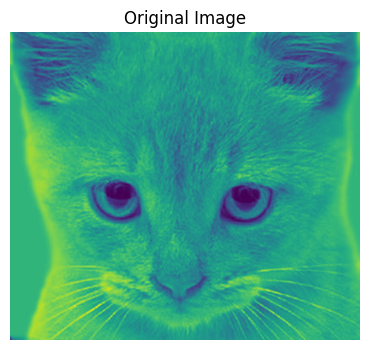

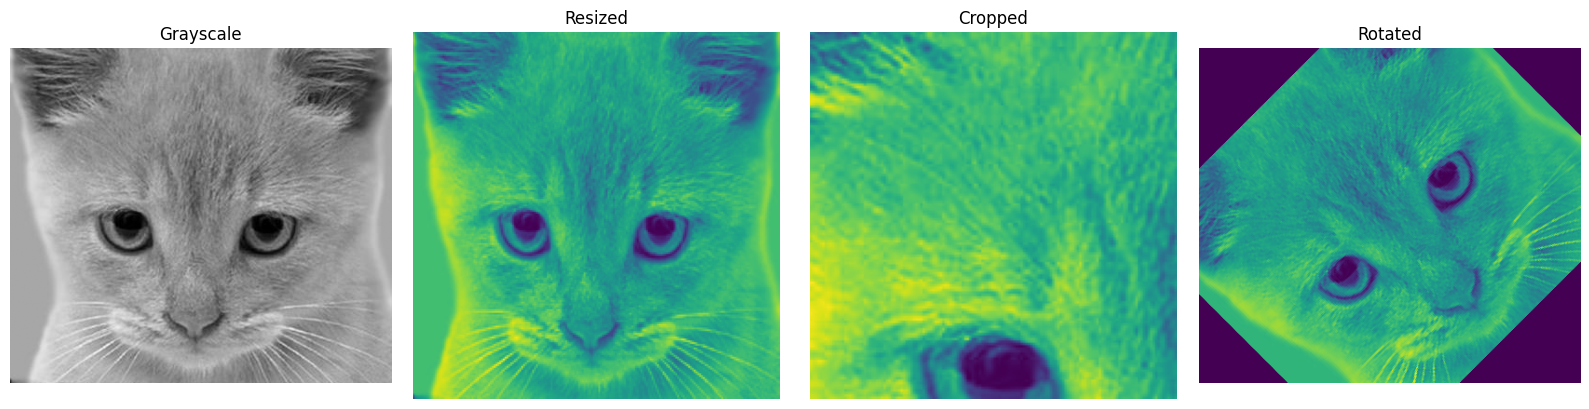

In [8]:
'''This tutrial will help you understand the basic image related operations like loading an image, resizing an image,
cropping and rotating an image etc'''


from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# 1. Load an image
img = Image.open('/content/cat_gray.jpg')  # Replace with your file path

# 2. Display original image
plt.figure(figsize=(6, 4))
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')
plt.show()

# 3. Convert to grayscale
img_gray = img.convert('L')

# 4. Resize image
img_resized = img.resize((200, 200))

# 5. Crop image (left, upper, right, lower)
img_cropped = img.crop((50, 50, 200, 200))

# 6. Rotate image
img_rotated = img.rotate(45)  # Rotate 45 degrees counter-clockwise

# 7. Display processed images in a single plot using subplot function
fig, axs = plt.subplots(1, 4, figsize=(16, 4))

axs[0].imshow(img_gray, cmap='gray')
axs[0].set_title("Grayscale")
axs[0].axis('off')

axs[1].imshow(img_resized)
axs[1].set_title("Resized")
axs[1].axis('off')

axs[2].imshow(img_cropped)
axs[2].set_title("Cropped")
axs[2].axis('off')

axs[3].imshow(img_rotated)
axs[3].set_title("Rotated")
axs[3].axis('off')

plt.tight_layout()
plt.show()


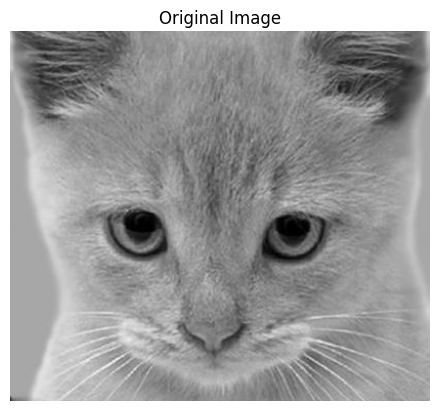

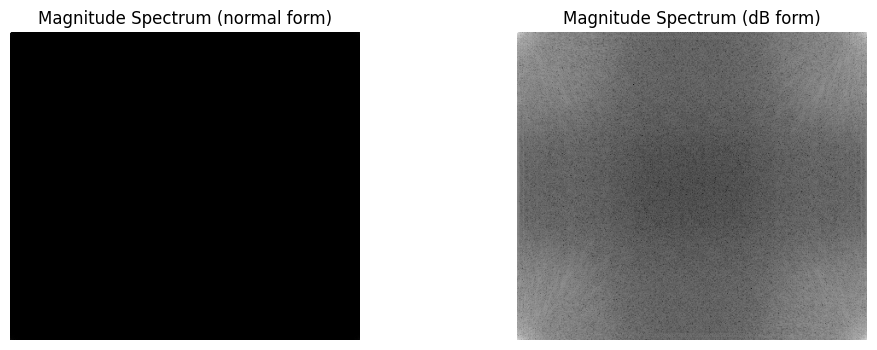

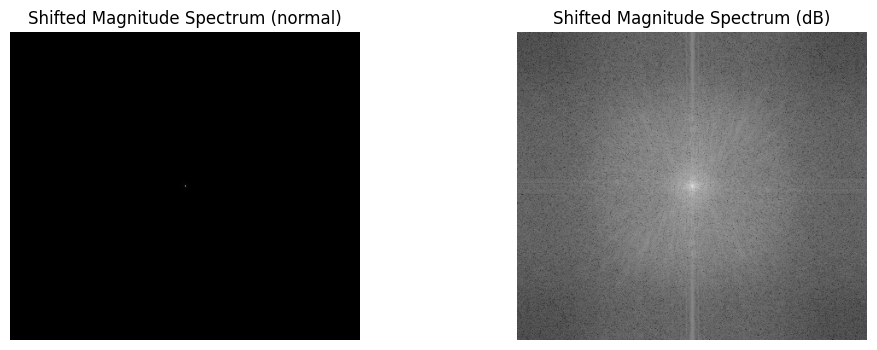

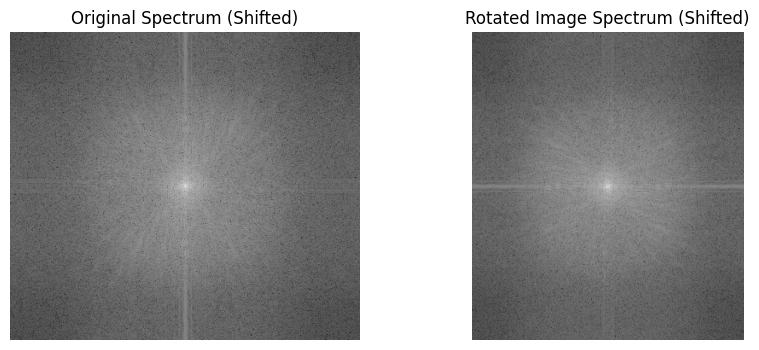

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load image
img = Image.open('/content/cat_gray.jpg').convert('L')
img_array = np.array(img)

# --- Original image ---
plt.imshow(img_array,cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

# --- 2D Fourier Transform ---
F = np.fft.fft2(img_array)
F_shifted = np.fft.fftshift(F)

# Magnitude spectra
mag_normal = np.abs(F)
mag_dB = 20 * np.log10(mag_normal + 1e-6)

mag_shifted = np.abs(F_shifted)
mag_shifted_dB = 20 * np.log10(mag_shifted + 1e-6)

# --- Plot magnitude spectrum (unshifted) ---
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(mag_normal, cmap='gray')
plt.title("Magnitude Spectrum (normal form)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mag_dB, cmap='gray')
plt.title("Magnitude Spectrum (dB form)")
plt.axis('off')
plt.show()

# --- Plot shifted spectrum ---
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(mag_shifted, cmap='gray')
plt.title("Shifted Magnitude Spectrum (normal)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mag_shifted_dB, cmap='gray')
plt.title("Shifted Magnitude Spectrum (dB)")
plt.axis('off')
plt.show()

# --- Rotate image 90° and compare spectra ---
rotated_img = np.rot90(img_array)
F_rot = np.fft.fft2(rotated_img)
F_rot_shifted = np.fft.fftshift(F_rot)
mag_rot_dB = 20 * np.log10(np.abs(F_rot_shifted) + 1e-6)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(mag_shifted_dB, cmap='gray')
plt.title("Original Spectrum (Shifted)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mag_rot_dB, cmap='gray')
plt.title("Rotated Image Spectrum (Shifted)")
plt.axis('off')
plt.show()


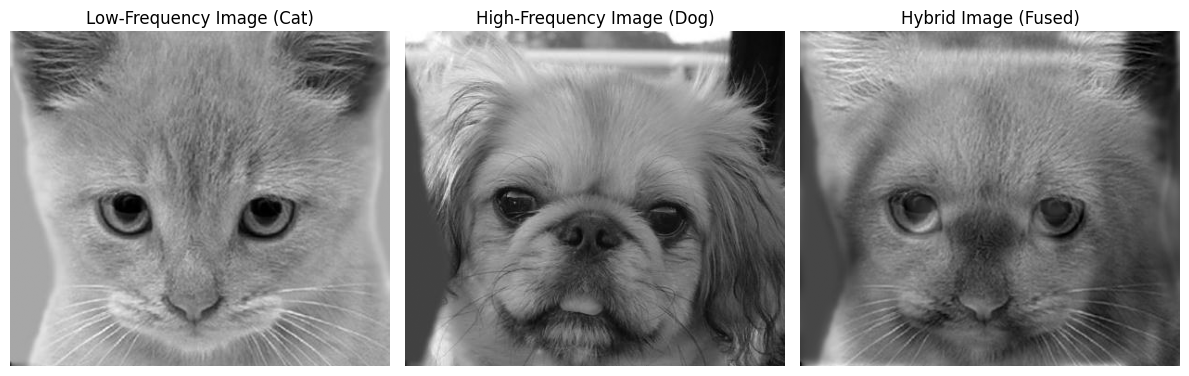

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

def gaussian_filter(shape, cutoff, highpass=False):
    """Returns a 2D Gaussian low-pass or high-pass filter"""
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    x = np.linspace(-ccol, ccol, cols)
    y = np.linspace(-crow, crow, rows)
    X, Y = np.meshgrid(x, y)
    D2 = X**2 + Y**2
    lowpass = np.exp(-D2 / (2 * (cutoff**2)))
    return 1 - lowpass if highpass else lowpass

# --- Load and align images ---
cat = Image.open("/content/cat_gray.jpg").convert('L')
dog = Image.open("/content/dog_gray.jpg").convert('L')
cat = ImageOps.fit(cat, dog.size)

# Convert to numpy arrays
cat_array = np.array(cat).astype(np.float32)
dog_array = np.array(dog).astype(np.float32)
shape = cat_array.shape

# --- Fourier Transforms ---
F_cat = np.fft.fftshift(np.fft.fft2(cat_array))
F_dog = np.fft.fftshift(np.fft.fft2(dog_array))

# --- Apply Gaussian Filters ---
cutoff=14
low_pass = gaussian_filter(shape, cutoff, highpass=False)
high_pass = gaussian_filter(shape, cutoff, highpass=True)

F_cat_filtered = F_cat * high_pass
F_dog_filtered = F_dog * low_pass

# --- Fuse in frequency domain ---
F_fused = F_cat_filtered + F_dog_filtered
fused = np.fft.ifft2(np.fft.ifftshift(F_fused))
fused = np.abs(fused)
fused = (fused - fused.min()) / (fused.max() - fused.min()) * 255
fused = fused.astype(np.uint8)

# --- Display Results ---
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(cat_array, cmap='gray')
plt.title("Low-Frequency Image (Cat)")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(dog_array, cmap='gray')
plt.title("High-Frequency Image (Dog)")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(fused, cmap='gray')
plt.title("Hybrid Image (Fused)")
plt.axis('off')

plt.tight_layout()
plt.show()
